In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [3]:
DATASET_DIR = "./Dataset"

In [4]:
SIZE = 224

In [5]:
def load_data(directories):
    data_names = []
    data = []
    labels = []
    for directory in directories:
        for label in ["real", "forge"]:  # Assuming labels are "real" and "fake"
            label_dir = os.path.join(directory, label)
            if not os.path.exists(label_dir):
                print(f"Directory does not exist: {label_dir}")
                continue
            print(f"Processing directory: {label_dir}")
            for img_path in glob.glob(os.path.join(label_dir, '*.*')):
                print(f"Reading image: {img_path}")
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (SIZE, SIZE))
                    data.append(img)
                    data_names.append(img_path)
                    if label == 'real':
                        labels.append(1)
                    else:
                        labels.append(0)
                else:
                    print(f"Failed to read image: {img_path}")

    data = np.array(data) / 255.0
    labels = np.array(labels)
    return data, labels, data_names

In [6]:
train_dirs = [os.path.join(DATASET_DIR, f"dataset{i}") for i in range(1, 4)]
test_dir = os.path.join(DATASET_DIR, "dataset4")

In [7]:
train_data, train_labels, train_data_names = load_data(train_dirs)
test_data, test_labels, test_data_names = load_data([test_dir])

Processing directory: ./Dataset\dataset1\real
Reading image: ./Dataset\dataset1\real\00100001.png
Reading image: ./Dataset\dataset1\real\00101001.png
Reading image: ./Dataset\dataset1\real\00102001.png
Reading image: ./Dataset\dataset1\real\00103001.png
Reading image: ./Dataset\dataset1\real\00104001.png
Reading image: ./Dataset\dataset1\real\00200002.png
Reading image: ./Dataset\dataset1\real\00201002.png
Reading image: ./Dataset\dataset1\real\00202002.png
Reading image: ./Dataset\dataset1\real\00203002.png
Reading image: ./Dataset\dataset1\real\00204002.png
Reading image: ./Dataset\dataset1\real\00300003.png
Reading image: ./Dataset\dataset1\real\00301003.png
Reading image: ./Dataset\dataset1\real\00302003.png
Reading image: ./Dataset\dataset1\real\00303003.png
Reading image: ./Dataset\dataset1\real\00304003.png
Reading image: ./Dataset\dataset1\real\00400004.png
Reading image: ./Dataset\dataset1\real\00401004.png
Reading image: ./Dataset\dataset1\real\00402004.png
Reading image: ./D

In [8]:
unique_labels, counts = np.unique(train_labels, return_counts=True)
print("Unique labels and their counts in training data:", dict(zip(unique_labels, counts)))

Unique labels and their counts in training data: {0: 270, 1: 270}


In [9]:
train_data_flattened = train_data.reshape(len(train_data), -1)
test_data_flattened = test_data.reshape(len(test_data), -1)

In [10]:
scaler = StandardScaler()
train_data_flattened = scaler.fit_transform(train_data_flattened)
test_data_flattened = scaler.transform(test_data_flattened)

In [11]:
classifier = RandomForestClassifier(n_estimators=200, random_state=42)
classifier.fit(train_data_flattened, train_labels)

RandomForestClassifier(random_state=42)

In [12]:
train_predictions = classifier.predict(train_data_flattened)
test_predictions = classifier.predict(test_data_flattened)

In [13]:
train_accuracy = accuracy_score(train_labels, train_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)


In [14]:
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 1.0
Test Accuracy: 0.7555555555555555


In [21]:
train_precision = precision_score(train_labels, train_predictions, average='weighted')
train_recall = recall_score(train_labels, train_predictions, average='weighted')
train_f1 = f1_score(train_labels, train_predictions, average='weighted')

In [22]:
test_precision = precision_score(test_labels, test_predictions, average='weighted')
test_recall = recall_score(test_labels, test_predictions, average='weighted')
test_f1 = f1_score(test_labels, test_predictions, average='weighted')

In [25]:
metrics = {
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-Score': [train_f1, test_f1]
}

In [33]:
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


    Dataset  Accuracy  Precision    Recall  F1-Score
0  Training  1.000000   1.000000  1.000000  1.000000
1   Testing  0.705556   0.705784  0.705556  0.705474


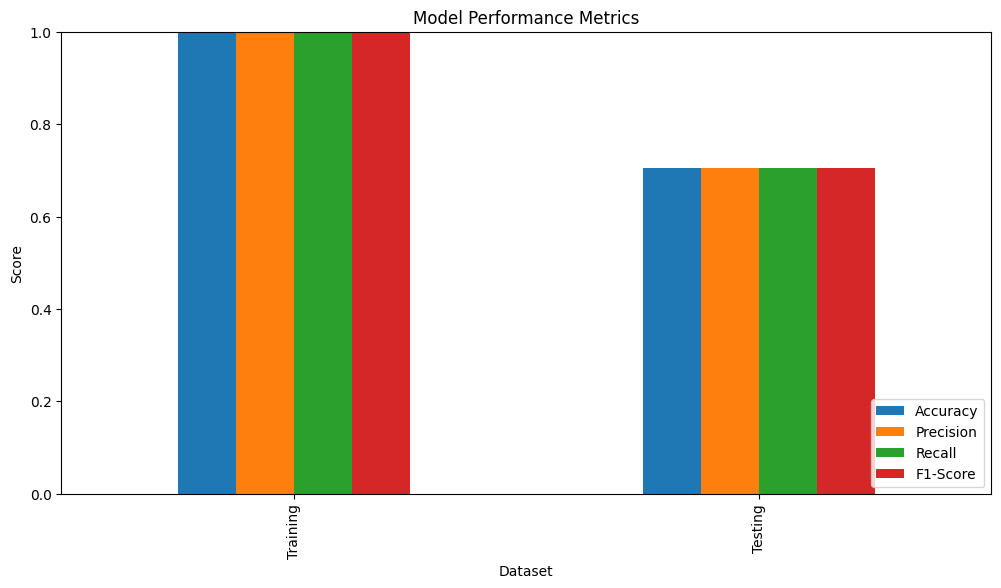

In [28]:
metrics_df.set_index('Dataset', inplace=True)
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

In [29]:
metrics = {
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-Score': [train_f1, test_f1]
}

In [30]:
def plot_flattened_image(image):
    plt.figure(figsize=(12, 3))
    plt.plot(image)
    plt.title('Flattened Image Data')
    plt.show()

In [31]:
def plot_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

In [32]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

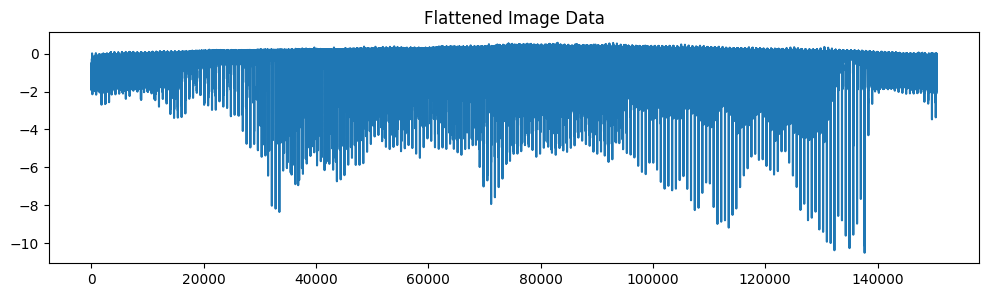

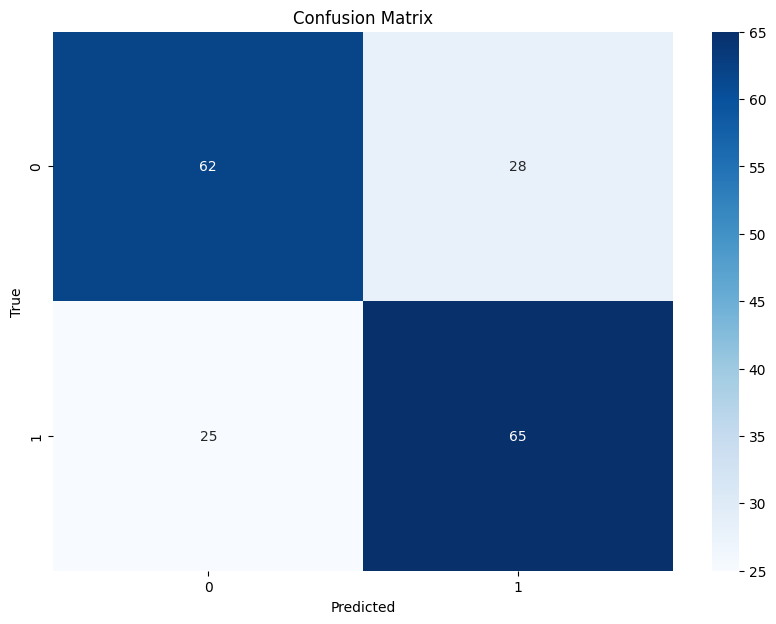

In [18]:

plot_confusion_matrix(test_labels, test_predictions, classes=np.unique(test_labels))

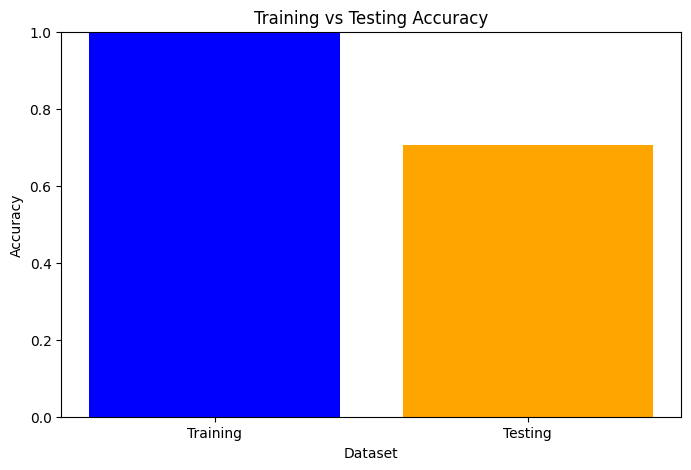

In [19]:
accuracies = {'Training': train_accuracy, 'Testing': test_accuracy}
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.ylim(0, 1)
plt.show()